In [1]:
from wholeslidedata.annotation.wholeslideannotation import WholeSlideAnnotation
from wholeslidedata.image.wholeslideimage import WholeSlideImage
from wholeslidedata.annotation.types import PolygonAnnotation as Polygon
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from tqdm import tqdm

import cv2

from py.helpers import get_outlines, get_area, get_patch, get_sub_areas, patch_empty, concat_one, BARRET_ROOT
import os

os.add_dll_directory(r'C:\Program Files\openslide-win64\bin') # for openslide

LANS_DIR = os.path.join(BARRET_ROOT, 'LANS_001-923')
LANS_BIOP_ROOT = os.path.join(BARRET_ROOT, 'p53_experiment_luuk_biopsy-level_no-HE')
LANS_BIOP_DIR = os.path.join(LANS_BIOP_ROOT, 'P53_score_high_consensus')

In [2]:
destination = os.path.join(LANS_BIOP_ROOT, "dataset_fullsize", f"biopsies_s{1.0}_data")
dest_biop = os.path.join(destination, "biopsies")
dest_mask = os.path.join(destination, "masks")

  0%|          | 0/10 [00:00<?, ?it/s]

[229 224 231]


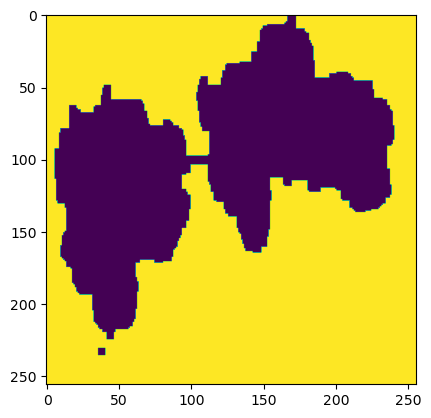

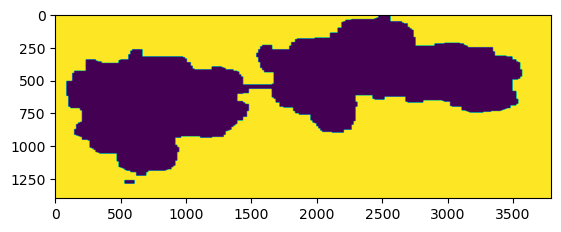

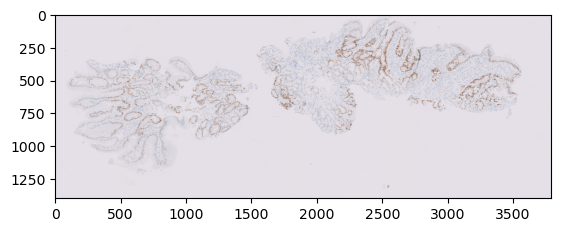

 10%|█         | 1/10 [00:00<00:08,  1.11it/s]

[226 227 228]


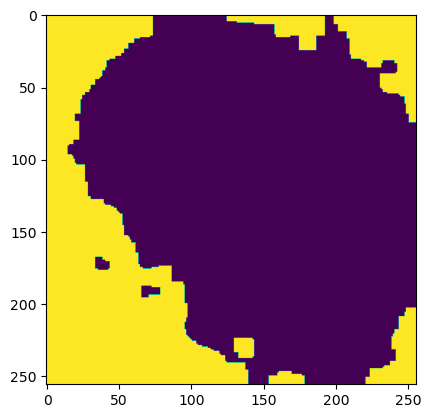

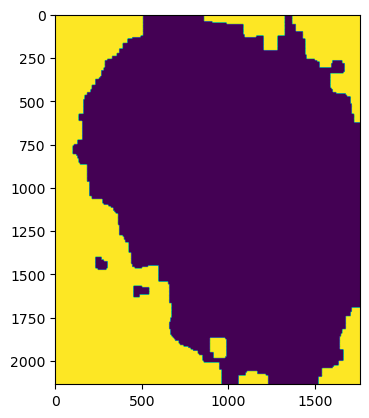

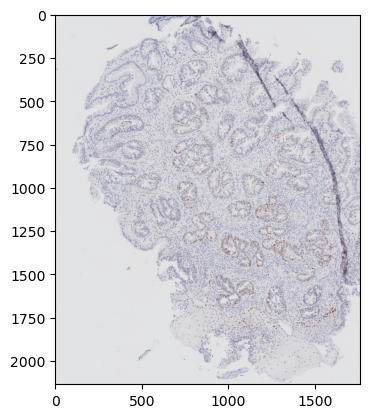

 20%|██        | 2/10 [00:01<00:06,  1.26it/s]

[229 226 231]


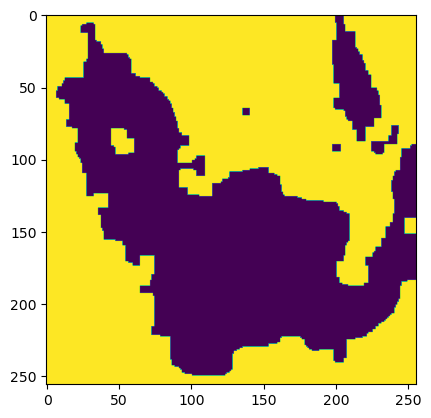

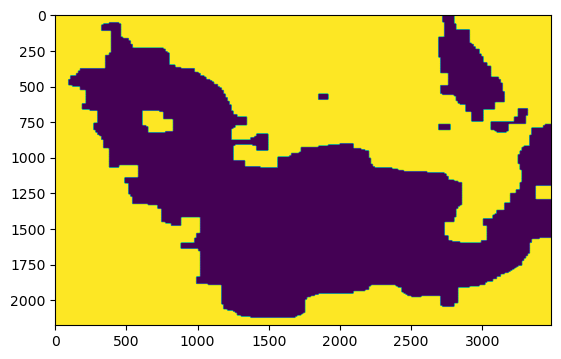

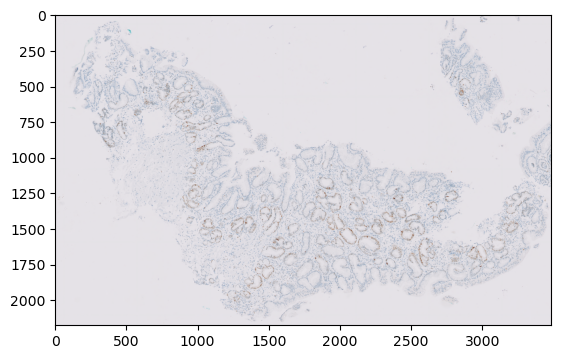

 30%|███       | 3/10 [00:02<00:06,  1.02it/s]

[227 227 228]


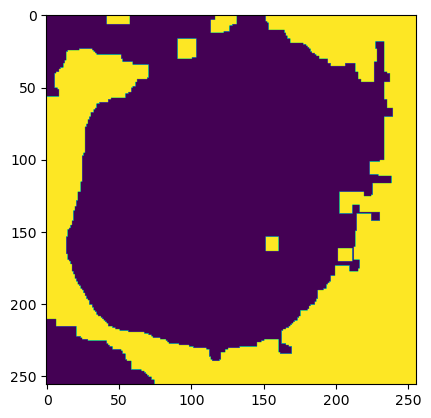

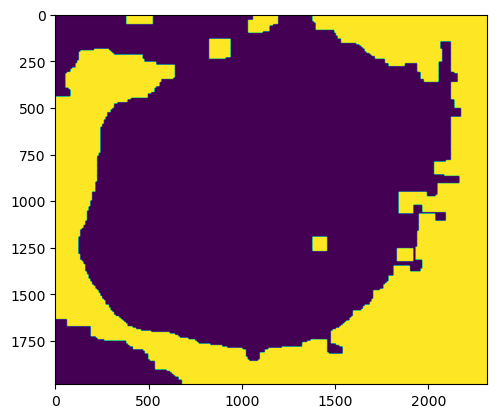

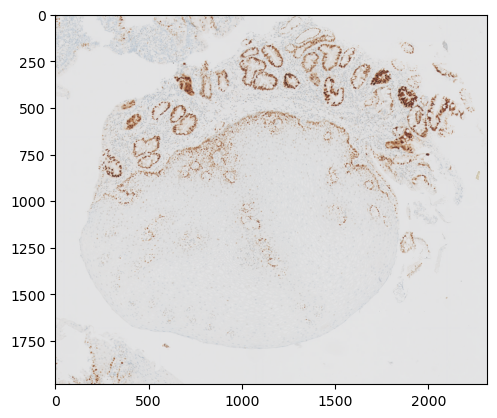

 40%|████      | 4/10 [00:03<00:05,  1.06it/s]

[226 224 229]


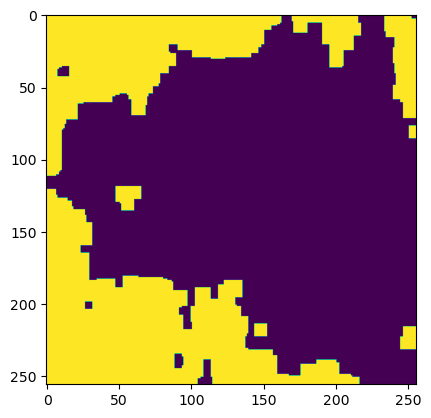

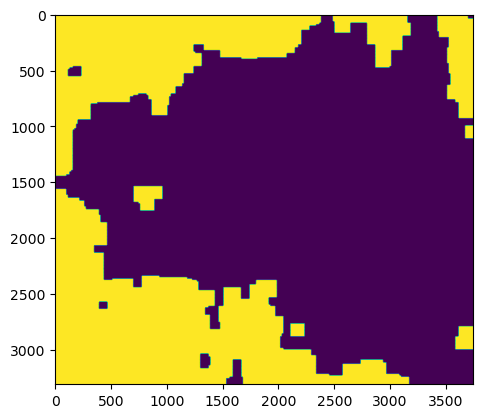

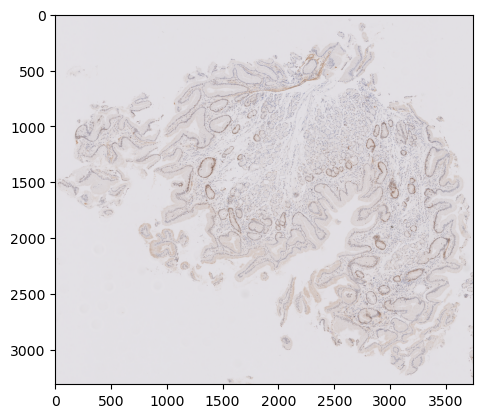

 50%|█████     | 5/10 [00:05<00:06,  1.27s/it]

[226 224 229]


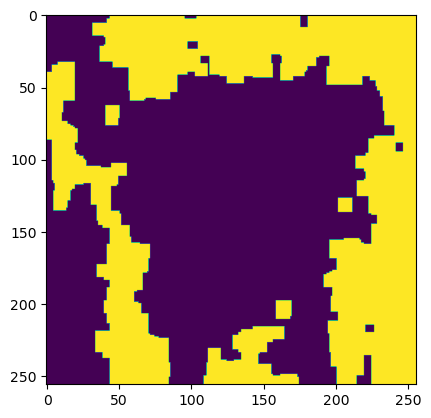

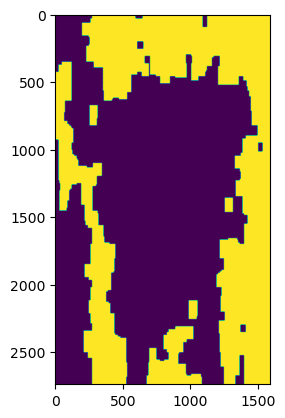

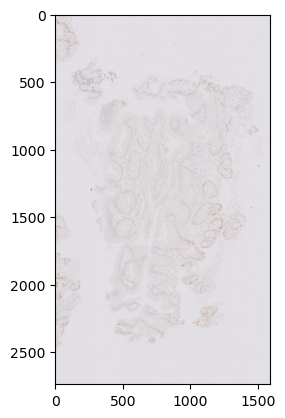

 60%|██████    | 6/10 [00:06<00:04,  1.10s/it]

[230 226 233]


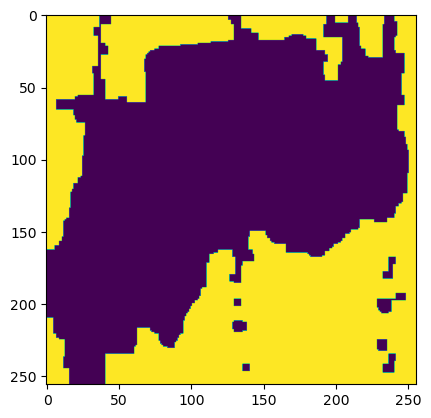

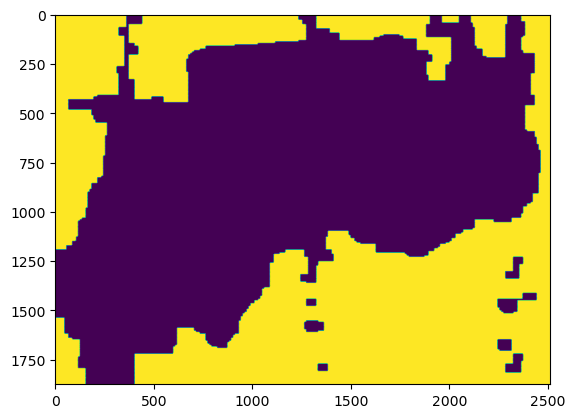

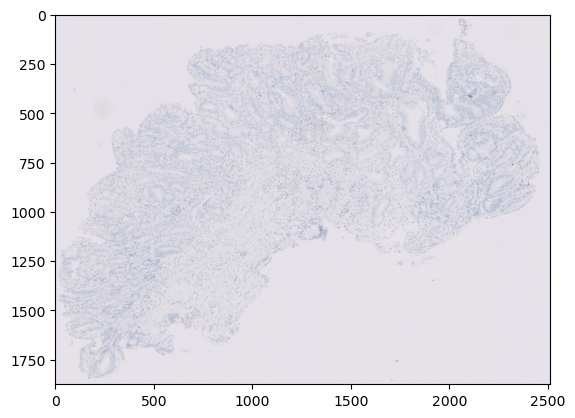

 70%|███████   | 7/10 [00:07<00:03,  1.05s/it]

[227 225 230]


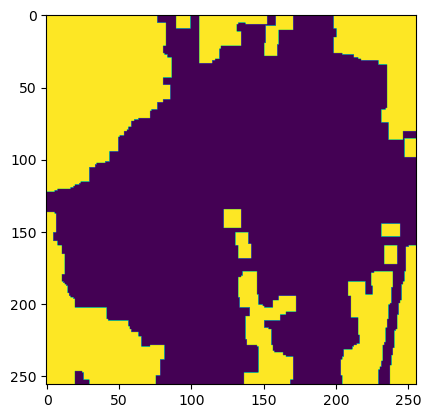

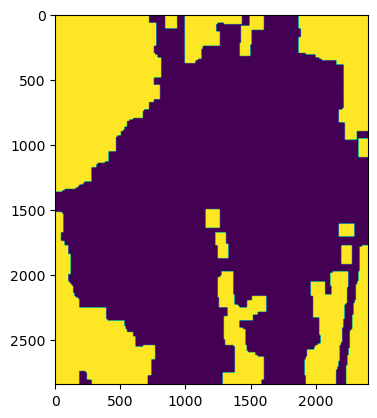

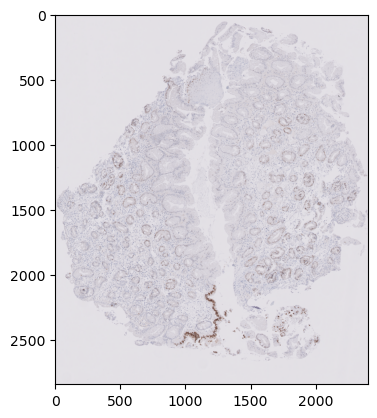

 80%|████████  | 8/10 [00:08<00:02,  1.09s/it]

[229 226 230]


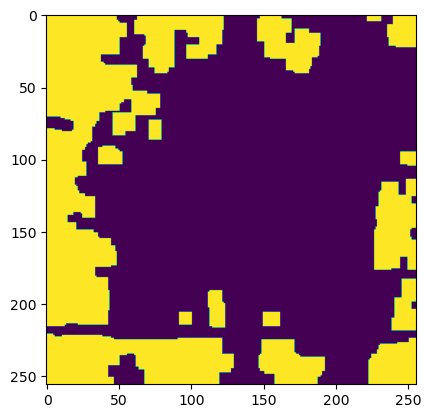

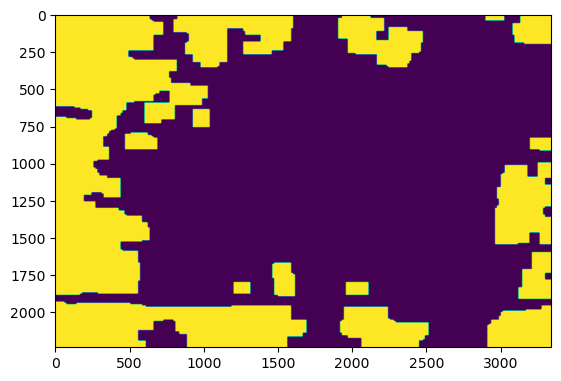

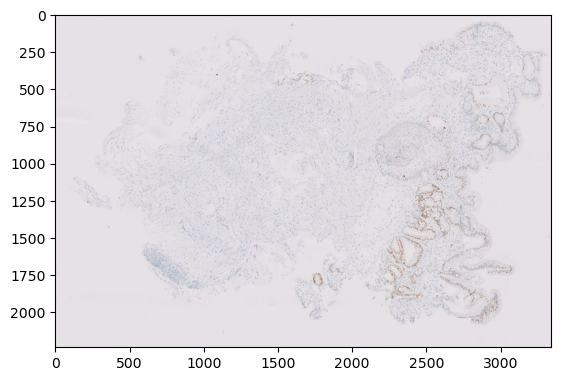

 90%|█████████ | 9/10 [00:09<00:01,  1.15s/it]

[227 224 229]


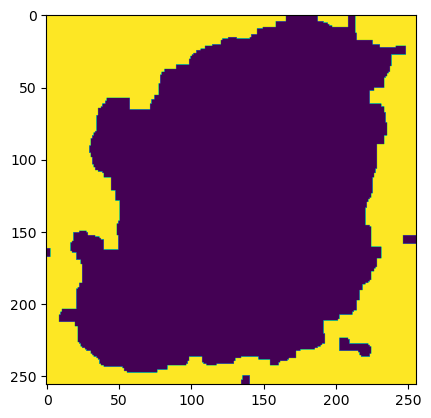

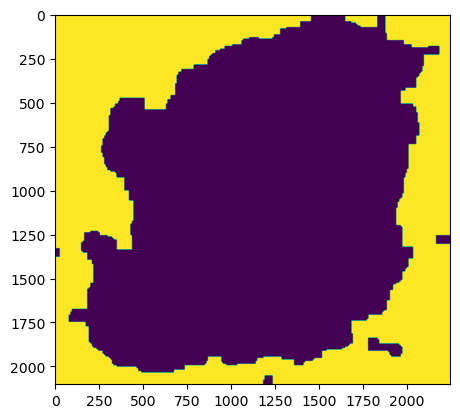

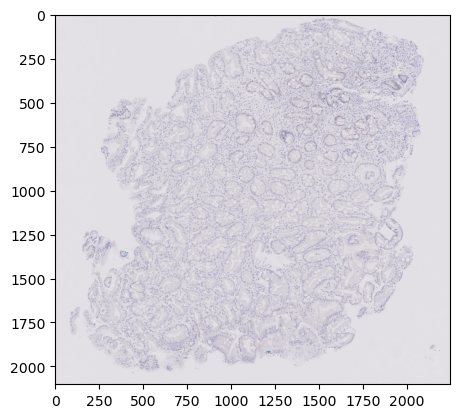

100%|██████████| 10/10 [00:10<00:00,  1.06s/it]


In [12]:
imgs = [f for f in os.listdir(dest_biop) if f.endswith('.png')]

for img in tqdm(imgs[:10]):
    # Show
    img_path = os.path.join(dest_biop, img)
    img = cv2.imread(img_path)

    # Get most common color
    flatten = img.reshape(-1, 3)
    df = pd.DataFrame(flatten, columns=['r', 'g', 'b'])
    most_common = df.mode().iloc[0].values
    print(most_common)
    # most_common = np.array([225, 225, 225])

    # Filter out most common color with a margin
    margin = 5
    mask = np.all(np.abs(img - most_common) < margin, axis=-1) # all channels within margin
    # Resize smaller for faster processing
    mask = cv2.resize(mask.astype(np.uint8), (256, 256))
    # mask = cv2.resize(mask.astype(np.uint8), (0,0), fx=0.1, fy=0.1)
    # Opening and Closing
    kernel = np.ones((3,3), np.uint8)
    mask = cv2.morphologyEx(mask.astype(np.uint8), cv2.MORPH_CLOSE, kernel, iterations=2)
    mask = cv2.morphologyEx(mask.astype(np.uint8), cv2.MORPH_OPEN, kernel, iterations=4)

    plt.imshow(mask)
    plt.show()

    # Make bigger again
    mask = cv2.resize(mask.astype(np.uint8), (img.shape[1], img.shape[0]))

    plt.imshow(mask)
    plt.show()

    # Make everything else black in img
    # img[mask] = [0, 0, 0]
    
    plt.imshow(img)
    plt.show()